# Data-Driven Modeling of Concentric Tube Continuum Robot (CTCR)

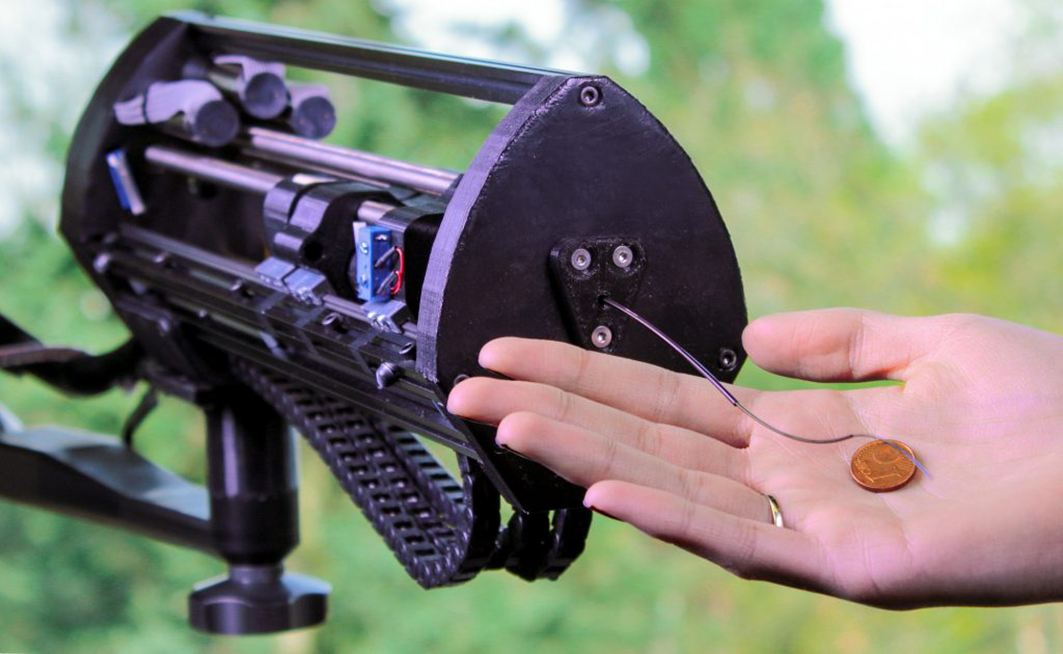

Continuum Robots are type of robot which are characterized by its absence of rigid-links and joint and continuous appearance. Among types of Continuum Robots, Concentric Tube refers to the mechanism which utilizes curved multi-tube catheter structures. There are difficulties to model Concentric Tube Continuum Robot using traditional physical based approach due to its non-linearity behaviour of elastic interactions between the flexible tubes. Data-driven approach can be utilized to be an alternative method, thus a smaller error motion could be achieved.

In this notebook, several regression techniques, such as Support Vector Regression (SVM) and Random Forest Regression, will be implemented to model the Forward Kinematics of CTCR. Moreover, to map the risky joint configurations to prevent loose of control and singularities, clustering methods such as K-Means and DBSCAN will be utilized.

## Table of Contents
1. [Data Overview](##1.-Data-Overview)
2. [Data Preprocessing](##2.-Data-Preprocessing)
3. [Regressions](##3.-Regressions)
4. [Clustering](##4.-Clustering)
 

## 1. Data Overview

Before getting further, in this section, the general overview of the data will be provided. First, the dataset will be imported to this notebook. Then, the overview of the dataset will be shown.


In [2]:
import pandas as pd

df = pd.read_csv('dataset/CRL-Dataset-CTCR-Pose.csv', header=None)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21      100

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.038446,-8.648766,-0.934423,-4.659318,-0.518523,-3.419294,-1.038446,-8.648766,-0.934423,-4.659318,...,0.086870,-0.409851,0.548841,-51.311665,-52.394960,-196.172089,0.651852,0.402930,-0.085287,0.636759
1,-0.849078,-12.935190,-0.948167,-4.141172,-0.835220,-1.755485,0.189368,-4.286425,-0.013744,0.518146,...,0.122501,-0.453856,0.544632,-50.692317,-60.809199,-208.382272,0.598864,0.371977,-0.123544,0.698378
2,-1.017749,-12.567895,-0.812003,-12.013610,-0.812547,-8.885584,-0.168671,0.367295,0.136164,-7.872439,...,0.095631,-0.442791,0.565367,-45.198441,-62.608553,-201.395251,0.611581,0.389910,-0.085298,0.683128
3,-0.549890,-12.088090,-0.942784,-10.099092,-0.983485,-6.809770,0.467859,0.479805,-0.130781,1.914518,...,0.136366,-0.478341,0.542060,-47.439516,-65.997012,-207.153421,0.527576,0.289144,-0.097064,0.792867
4,-0.983188,-22.793282,-0.975256,-3.773322,-0.944051,-1.200367,-0.433298,-10.705192,-0.032472,6.325771,...,0.155923,-0.473531,0.541701,-51.306577,-58.613165,-219.831348,0.616890,0.331818,-0.194669,0.686621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.013616,-115.908578,0.129843,-86.372926,0.793488,-47.812503,0.660221,3.220634,0.054423,4.742424,...,-0.465600,-0.127947,0.686238,11.500513,28.227900,-245.757880,0.634882,-0.383059,0.067531,0.667555
99996,0.991986,-116.383328,0.789818,-88.284428,0.139324,-44.712237,-0.021630,-0.474749,0.659975,-1.911502,...,-0.425068,-0.162333,0.736364,10.706496,17.988644,-240.644806,0.604545,-0.346952,0.039395,0.715960
99997,0.987575,-113.233227,0.737640,-82.726911,0.921319,-42.586561,-0.004412,3.150100,-0.052177,5.557516,...,-0.522901,-0.001744,0.723779,9.452766,35.094901,-250.906354,0.580659,-0.459221,0.149290,0.655487
99998,0.881862,-117.309543,0.918263,-85.435163,0.594123,-48.462650,-0.105713,-4.076316,0.180623,-2.708252,...,-0.482495,-0.034416,0.741441,12.219248,28.893432,-247.017541,0.576371,-0.444613,0.094256,0.679140


There was no proper label for the data. Therefore, the labeling is necessary to ease the data understanding. The data will be labeled according to the paper's description.

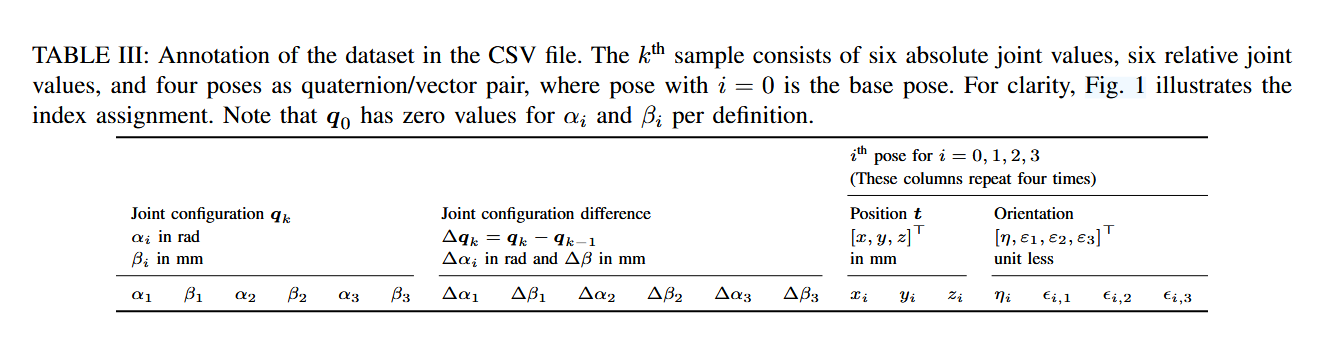

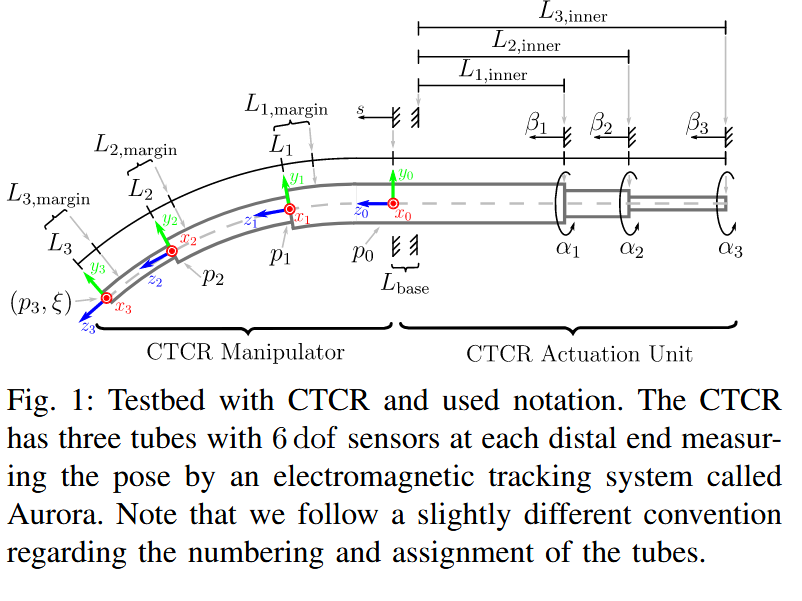

In [3]:
df.columns  = ['alpha1', 'beta1', 'alpha2', 'beta2','alpha3','beta3',                     # joint configuration qk
               'd_alpha1', 'd_beta1', 'd_alpha2', 'd_beta2', 'd_alpha3', 'd_beta3',       # joint configuration d_qk
               'x0', 'y0', 'z0', 'eta0', 'eps0,1', 'eps0,2', 'eps0,3',                    # 0th pose
               'x1', 'y1', 'z1', 'eta1', 'eps1,1', 'eps1,2', 'eps1,3',                    # 1st pose
               'x2', 'y2', 'z2', 'eta2', 'eps2,1', 'eps2,2', 'eps2,3',                    # 2nd pose
               'x3', 'y3', 'z3', 'eta3', 'eps3,1', 'eps3,2', 'eps3,3']                    # 3rd pose

df

,alpha1,beta1,alpha2,beta2,alpha3,beta3,d_alpha1,d_beta1,d_alpha2,d_beta2,...,"eps2,1","eps2,2","eps2,3",x3,y3,z3,eta3,"eps3,1","eps3,2","eps3,3"
0,-1.038446,-8.648766,-0.934423,-4.659318,-0.518523,-3.419294,-1.038446,-8.648766,-0.934423,-4.659318,...,0.086870,-0.409851,0.548841,-51.311665,-52.394960,-196.172089,0.651852,0.402930,-0.085287,0.636759
1,-0.849078,-12.935190,-0.948167,-4.141172,-0.835220,-1.755485,0.189368,-4.286425,-0.013744,0.518146,...,0.122501,-0.453856,0.544632,-50.692317,-60.809199,-208.382272,0.598864,0.371977,-0.123544,0.698378
2,-1.017749,-12.567895,-0.812003,-12.013610,-0.812547,-8.885584,-0.168671,0.367295,0.136164,-7.872439,...,0.095631,-0.442791,0.565367,-45.198441,-62.608553,-201.395251,0.611581,0.389910,-0.085298,0.683128
3,-0.549890,-12.088090,-0.942784,-10.099092,-0.983485,-6.809770,0.467859,0.479805,-0.130781,1.914518,...,0.136366,-0.478341,0.542060,-47.439516,-65.997012,-207.153421,0.527576,0.289144,-0.097064,0.792867
4,-0.983188,-22.793282,-0.975256,-3.773322,-0.944051,-1.200367,-0.433298,-10.705192,-0.032472,6.325771,...,0.155923,-0.473531,0.541701,-51.306577,-58.613165,-219.831348,0.616890,0.331818,-0.194669,0.686621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.013616,-115.908578,0.129843,-86.372926,0.793488,-47.812503,0.660221,3.220634,0.054423,4.742424,...,-0.465600,-0.127947,0.686238,11.500513,28.227900,-245.757880,0.634882,-0.383059,0.067531,0.667555
99996,0.991986,-116.383328,0.789818,-88.284428,0.139324,-44.712237,-0.021630,-0.474749,0.659975,-1.911502,...,-0.425068,-0.162333,0.736364,10.706496,17.988644,-240.644806,0.604545,-0.346952,0.039395,0.715960
99997,0.987575,-113.233227,0.737640,-82.726911,0.921319,-42.586561,-0.004412,3.150100,-0.052177,5.557516,...,-0.522901,-0.001744,0.723779,9.452766,35.094901,-250.906354,0.580659,-0.459221,0.149290,0.655487
99998,0.881862,-117.309543,0.918263,-85.435163,0.594123,-48.462650,-0.105713,-4.076316,0.180623,-2.708252,...,-0.482495,-0.034416,0.741441,12.219248,28.893432,-247.017541,0.576371,-0.444613,0.094256,0.679140


In [4]:
df.describe()

,alpha1,beta1,alpha2,beta2,alpha3,beta3,d_alpha1,d_beta1,d_alpha2,d_beta2,...,"eps2,1","eps2,2","eps2,3",x3,y3,z3,eta3,"eps3,1","eps3,2","eps3,3"
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.002275,-65.006369,0.000954,-47.554744,0.002212,-24.989130,0.000068,-0.009624,0.000064,-0.007282,...,-0.235298,-0.241287,0.660118,-21.200480,8.217807,-214.128752,0.709226,-0.043455,0.021765,0.663939
std,0.604197,21.923252,0.603566,19.431823,0.604409,14.421860,0.826552,13.641847,0.830880,13.568265,...,0.132140,0.142874,0.076612,14.701703,25.034383,13.678106,0.084203,0.140949,0.137199,0.089675
min,-1.047196,-128.607520,-1.047185,-94.899929,-1.047158,-49.998779,-2.075505,-55.687206,-2.087711,-57.273481,...,-0.578779,-0.625398,0.211942,-72.176044,-65.997012,-255.109247,0.117831,-0.487101,-0.582243,-0.164765
25%,-0.527735,-80.652032,-0.521451,-61.517094,-0.522239,-37.479649,-0.578014,-9.321451,-0.585607,-9.194281,...,-0.331642,-0.347048,0.600882,-32.561901,-11.280424,-223.967005,0.657030,-0.140696,-0.073484,0.606037
50%,-0.005026,-65.078763,-0.000581,-47.581506,0.002688,-25.030116,-0.001707,-0.025989,0.003449,-0.026883,...,-0.243538,-0.252719,0.668992,-20.518868,8.374310,-214.380231,0.710893,-0.044395,0.020701,0.665420
75%,0.521827,-49.470176,0.522425,-33.582706,0.524486,-12.529527,0.581041,9.279608,0.583411,9.207932,...,-0.143586,-0.139645,0.721549,-9.878360,27.622821,-204.579292,0.766018,0.054800,0.117321,0.725387
max,1.047153,-0.511163,1.047180,-0.269727,1.047189,-0.000058,2.086869,52.333320,2.084141,61.036353,...,0.181712,0.428353,0.930764,18.589407,85.632458,-172.815256,0.968191,0.438680,0.511710,0.957530


Based on the paper, the Shape Representation can be simplified as following:

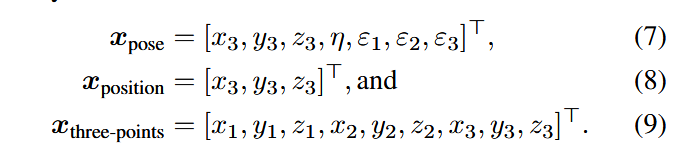

Thus, the correlation between Joint Space Representation and Shape Representation can be visualized using a heatmap.

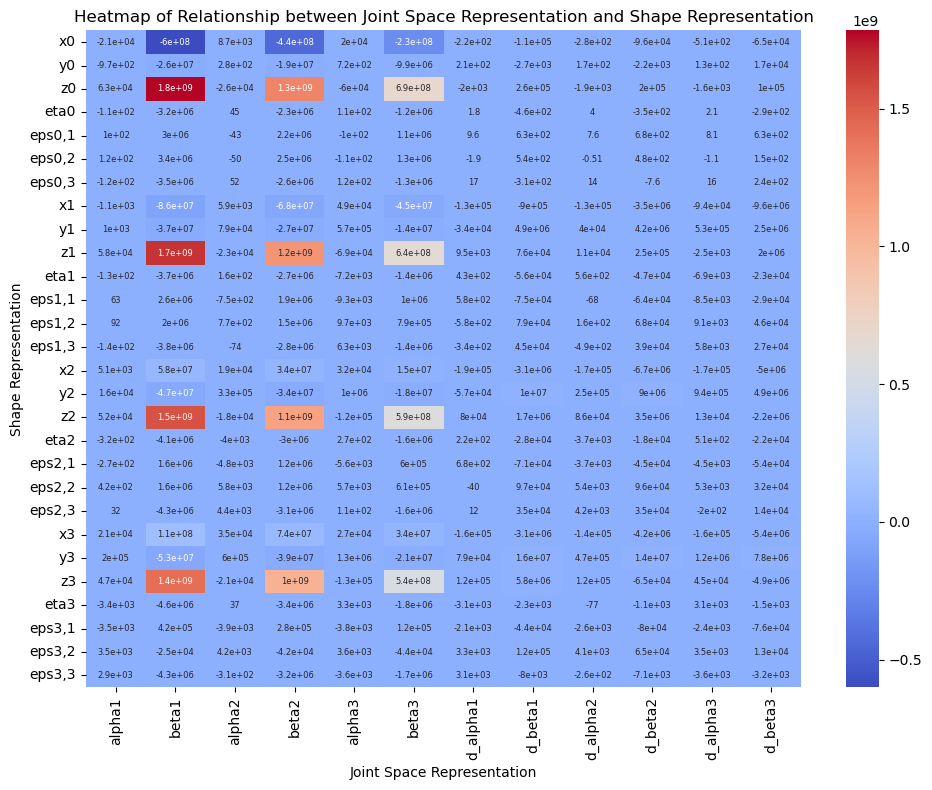

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into two parts: first 12 columns and remaining 28 columns
# The first 12 columns are Joint Space Representation, and the rest are Shape Reperesentation
first_12_columns = df.iloc[:, :12]
remaining_columns = df.iloc[:, 12:]


# Compute the dot product 
# correlation_matrix = first_12_columns.T.dot(remaining_columns)
correlation_matrix = remaining_columns.T.dot(first_12_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 6}, cmap="coolwarm", xticklabels=first_12_columns.columns, yticklabels=remaining_columns.columns)
plt.title("Heatmap of Relationship between Joint Space Representation and Shape Representation")
plt.ylabel("Shape Representation")
plt.xlabel("Joint Space Representation")
plt.tight_layout()
plt.show()





Since: 

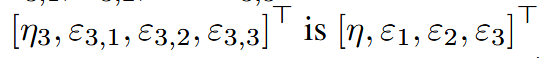

The heatmap can be simplified as following:

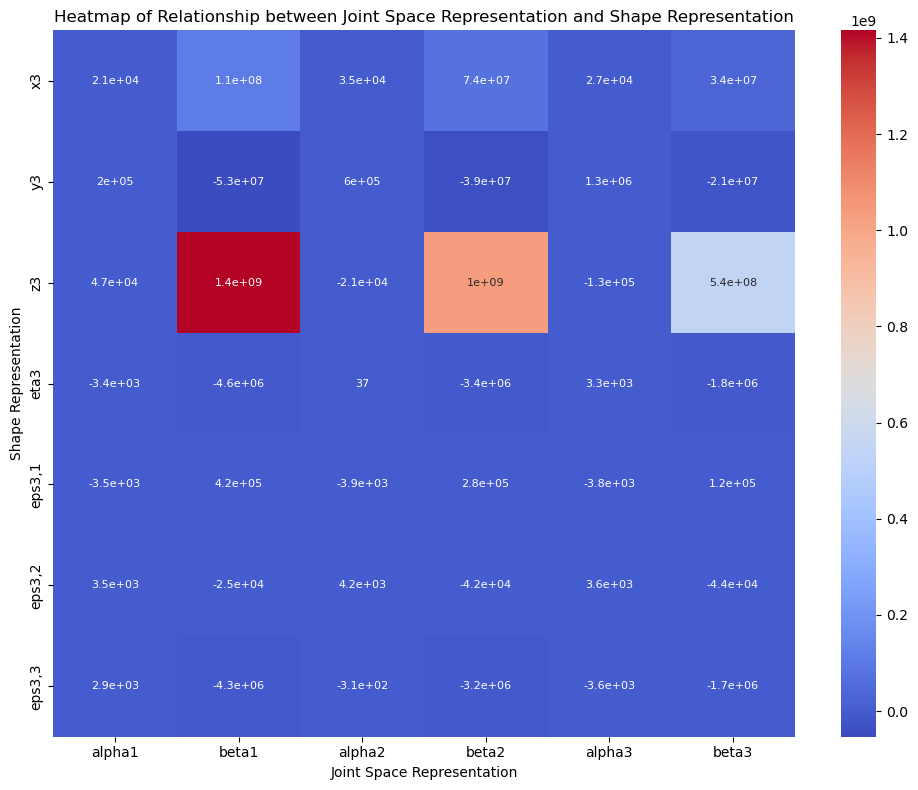

In [45]:
joint_rep = df.iloc[:, :6]

shape_rep = df.loc[:,['x3', 'y3', 'z3', 'eta3', 'eps3,1', 'eps3,2', 'eps3,3']]

correlation_matrix = shape_rep.T.dot(joint_rep)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm", xticklabels=joint_rep.columns, yticklabels=shape_rep.columns)
plt.title("Heatmap of Relationship between Joint Space Representation and Shape Representation")
plt.ylabel("Shape Representation")
plt.xlabel("Joint Space Representation")
plt.tight_layout()
plt.show()

Strange behaviour of the robot can also be checked through boxplot, to see the outlier values. These outliers will be discussed in the next sections.

<Axes: >

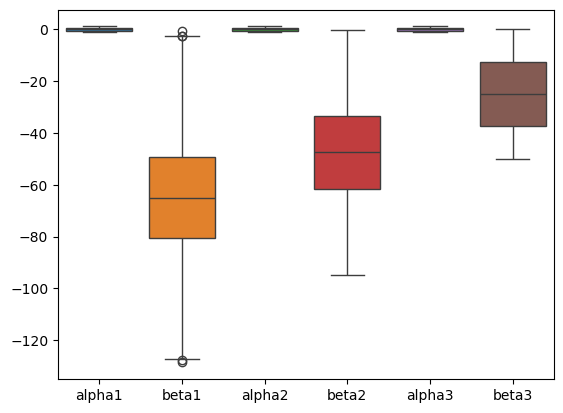

In [55]:
sns.boxplot(joint_rep)

<Axes: >

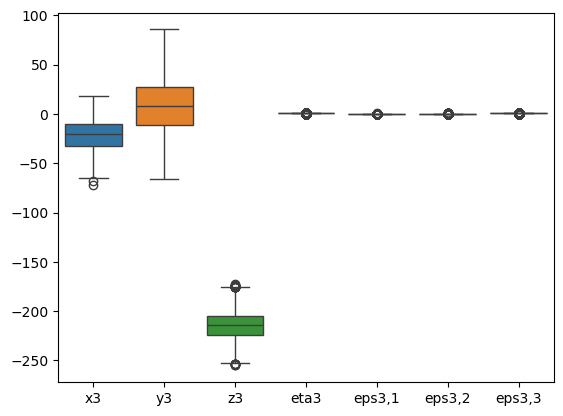

In [53]:
sns.boxplot(shape_rep)

## 2. Data Preprocessing

In this section, some data preprocessing tasks will be performed. First, it is necessary to see if the data has any missing value.

In [30]:
mv = df.isnull().sum()

mv

alpha1      0
beta1       0
alpha2      0
beta2       0
alpha3      0
beta3       0
d_alpha1    0
d_beta1     0
d_alpha2    0
d_beta2     0
d_alpha3    0
d_beta3     0
x0          0
y0          0
z0          0
eta0        0
eps0,1      0
eps0,2      0
eps0,3      0
x1          0
y1          0
z1          0
eta1        0
eps1,1      0
eps1,2      0
eps1,3      0
x2          0
y2          0
z2          0
eta2        0
eps2,1      0
eps2,2      0
eps2,3      0
x3          0
y3          0
z3          0
eta3        0
eps3,1      0
eps3,2      0
eps3,3      0
dtype: int64

Since there was no missing value, further data cleaning tasks are not necessary. This data is understandably clean since it was taken in a controlled laboratory environment.

Next step, the data can be splitted into train_set, validation_set (to tune the hyperparameters), test set, based on the paper proportion, which is 80:10:10.

In [73]:
from sklearn.model_selection import train_test_split
import numpy as np

# Input
X = joint_rep.values

# Output
y = df.iloc[:, [30, 31, 32]].values

# Split into train (80%), validation (10%), test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



Transform Joint Space like Eq. 5

In [74]:
def transform_joints(joints):
    # joints: [N, 6] → [N, 9] (Eq. 5: cos/sine of αᵢ + normalized βᵢ)
    alpha = joints[:, [0, 2, 4]]  # α₁, α₂, α₃
    beta = joints[:, [1, 3, 5]]   # β₁, β₂, β₃
    
    gamma = np.column_stack([np.cos(alpha), np.sin(alpha)])  # γ₁₁, γ₁₂, γ₂₁, ...
    beta_u = 2 * (beta - beta.min(axis=0)) / (beta.max(axis=0) - beta.min(axis=0)) - 1  # βᵢᵤ ∈ [-1, 1]
    
    return np.hstack([gamma, beta_u])  # [N, 9]

X_train_transformed = transform_joints(X_train)
X_val_transformed = transform_joints(X_val)
X_test_transformed = transform_joints(X_test)

## 3. Regressions

To model the forward kinematics of CTCR, the proposed method on the paper was Feedforward Neural Network. However, in this notebook, classic data mining techniques will be used, such as Linear Regression, Random Forest Regression and Support Vector Regression.

### 3.1. Linear Regression

In [75]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train
model = LinearRegression()
model.fit(X_train_transformed, y_train)  # Use transformed joints for better results

# Predict on validation set
y_val_pred = model.predict(X_val_transformed)

# Evaluate
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.2f} mm")

Validation RMSE: 0.02 mm


Evaluate on test set

In [76]:
y_test_pred = model.predict(X_test_transformed)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {val_rmse:.2f} mm")  # Expected: ~3-5 mm (worse than paper's FNN)

Test RMSE: 0.02 mm


Result Interpretation

In [77]:
# Check learned weights (for first output dimension, x₃)
print("Model coefficients (shape):", model.coef_.shape)  # [3, 9] (3 outputs × 9 features)
print("Coefficients for x₃ prediction:", model.coef_[0])

Model coefficients (shape): (3, 9)
Coefficients for x₃ prediction: [ 0.00031222 -0.01954957  0.04841128 -0.01054743 -0.14606808 -0.16962368
 -0.04219736  0.19638024 -0.07090659]


Plotting result

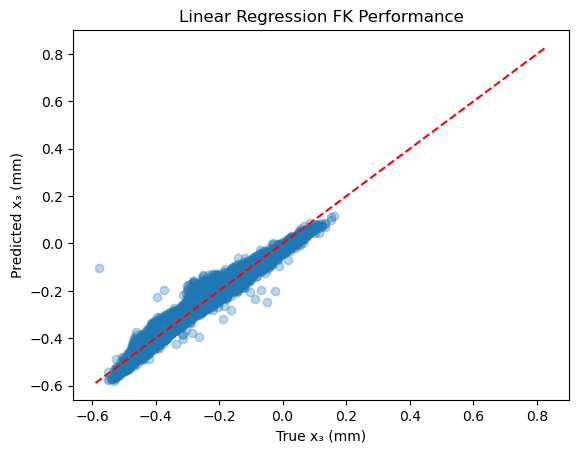

In [78]:
# Plot true vs predicted x₃ coordinates
plt.scatter(y_test[:, 0], y_test_pred[:, 0], alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True x₃ (mm)")
plt.ylabel("Predicted x₃ (mm)")
plt.title("Linear Regression FK Performance")
plt.show()

### 3.2. Support Vector Regression

### 3.3. Random Forest Regression

## 4. Clustering

### 4.1. K-Means 

### 4.2. DBSCAN

## 5. Outlier Analysis